# Regression

---

**Numpy** or **Numerical Python** is the fundamental package for numeric computing with Python. It provides powerful ways to create,
store, and/or manipulate data, which makes it able to seamlessly and speedily integrate with a wide variety
of databases. Numpy is the foundation of several libraries such as `Pandas`, `SciPy`, `SymPy`


In this lecture, we will talk about creating array with certain data types, manipulating array, selecting
elements from arrays, as well as universal functions of NumPy and how to use its statistical and mathematical capabilities. Moreover, we see how to load dataset into array. Such functions are useful for manipulating data and
understanding the functionalities of other common Python data packages.


### Lecture outline

---

* Problem Statement


* Data Description


* EDA - Exploratory Data Analysis


* Data Processing


* Linear Regression


* Decision Tree Regression


* Random Forest Regression


* Model Performance Assessment

#### Reference


[Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)


[Ordinary Least Squares](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)


[sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn - Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


[sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

In [21]:
plt.style.use("seaborn") # Set plotting style

## Problem Statement

---

To make their profit, insurance companies should collect higher premium than the amount paid to the insured person. Due to this, insurance companies invests a lot of time, effort, and money in creating models that accurately predicts health care costs and then correspondingly charge the insured person.


Today, we build one of the simplest model to make a prediction. However, this simples model will give the best way to interpret the modeling results, compared to other "black-box" machine learning model results.

## Data Description

---

Generally, many factors that affect how much we pay for health insurance are not within our control: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost for the American people. We will predict individual medical costs billed by health insurance.

$$
$$


* **age**: Age of primary beneficiary


* **sex**: Insurance contractor gender, female or male


* **bmi**: Body Mass Index


* **children**: Number of children covered by health insurance / Number of dependents


* **smoker**: Smoking or not


* **region**: The beneficiary's residential area in the US

In [2]:
df = pd.read_csv("data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA - Exploratory Data Analysis

---

EDA helps us to have a better understanding of our data. In this step we try to extract as much information from our data as possible, such as to guess the data generation process and the distribution of the variables. By having this information we then be able to choose correct model and validate model assumptions. For example, if the data is not normally distributed then we cannot use models which assumed normal distribution in variables and hence we have to change our strategy.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

### Checking Missing Values

---

We don't have missing values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate Analysis

---

In this stage, we examine variables one-by-one. The best way is to plot the histogram if the variable is continuous or count/frequency plot for categorical variable.

`age` seems to be uniformly distributed

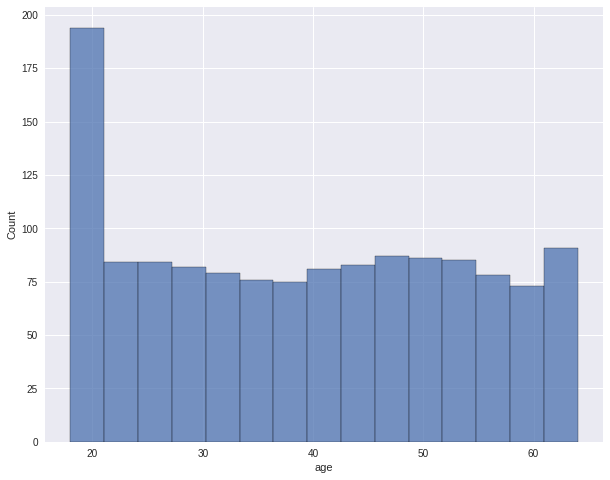

In [30]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15);

Histogram of `age` by `smoker` type

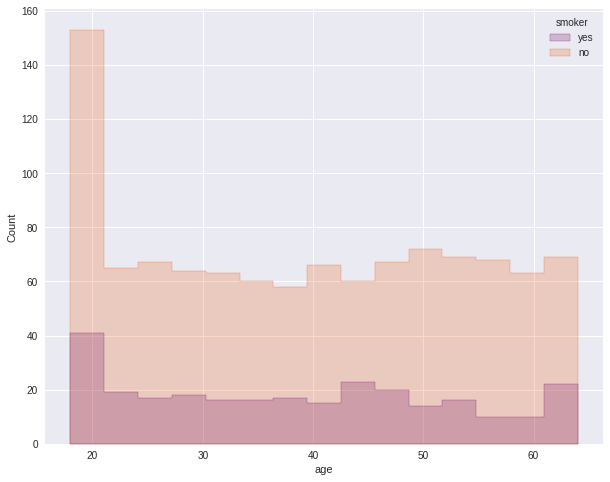

In [41]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15, hue="smoker", element="step", palette="inferno");

Histogram of `age` by `sex`

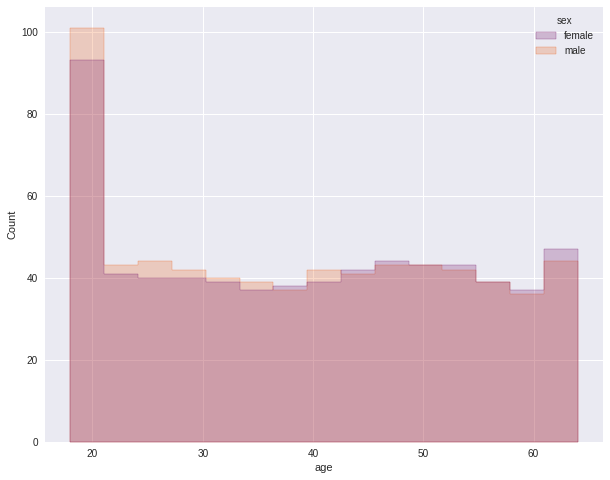

In [40]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15, hue="sex", element="step", palette="inferno");

`bmi` is normally distributed as expected!

Something strange happens here. The average a=of `bmi` is 30. With a value equal to 30 starts obesity. Are obese people tend to spend more in heath care?

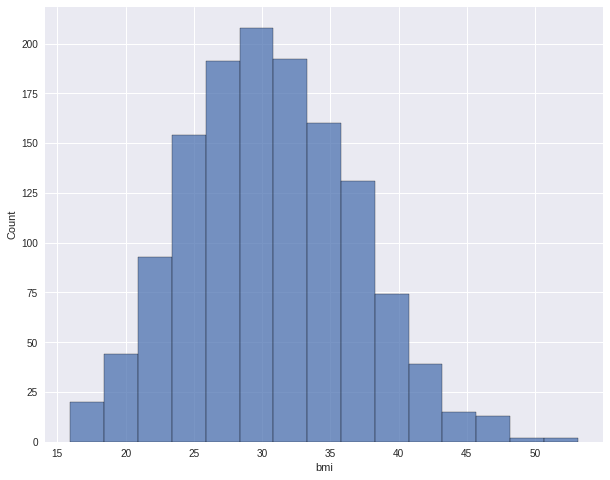

In [36]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15);

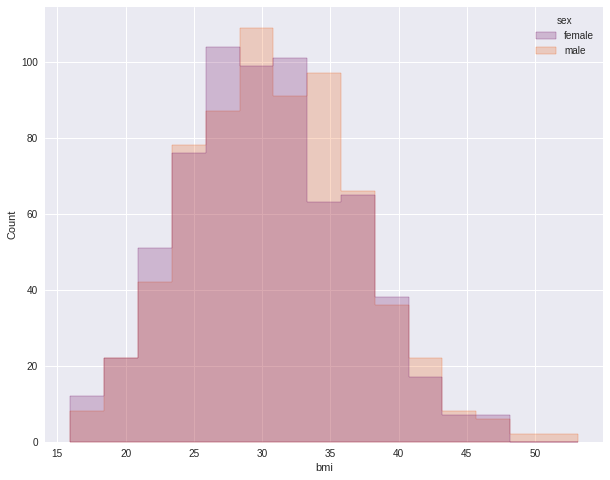

In [39]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15, hue="sex", element="step", palette="inferno");

This plot indicates that we have more non-smoker in the data then smokers

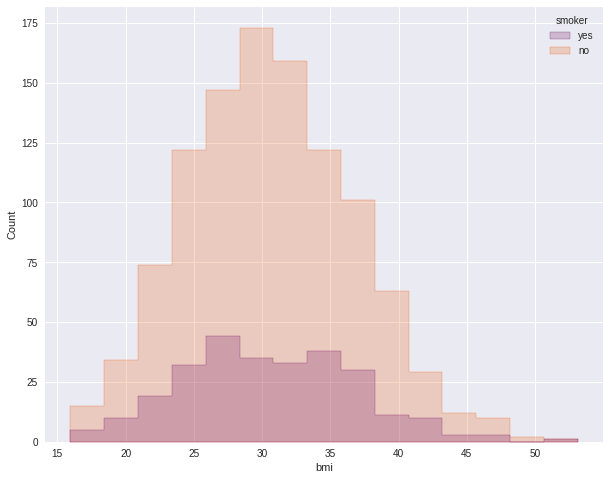

In [44]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15, hue="smoker", element="step", palette="inferno");

In [47]:
df["smoker"].value_counts() # This is the case

no     1064
yes     274
Name: smoker, dtype: int64

The distribution of male and female are the same

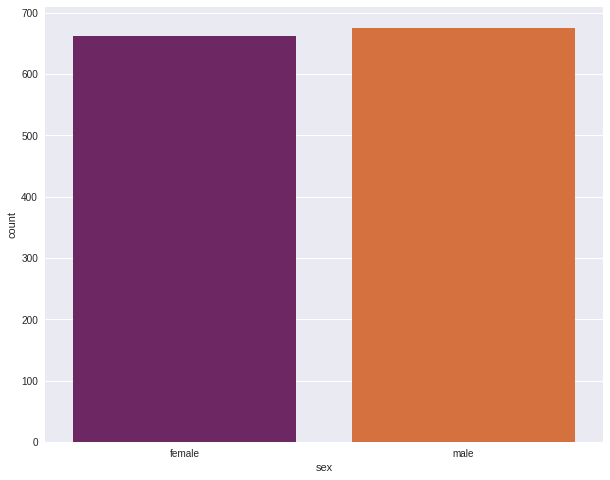

In [48]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="sex", palette="inferno");

The count plot of `sex` by `smoker`. Plot indicates that there are more male smokers.

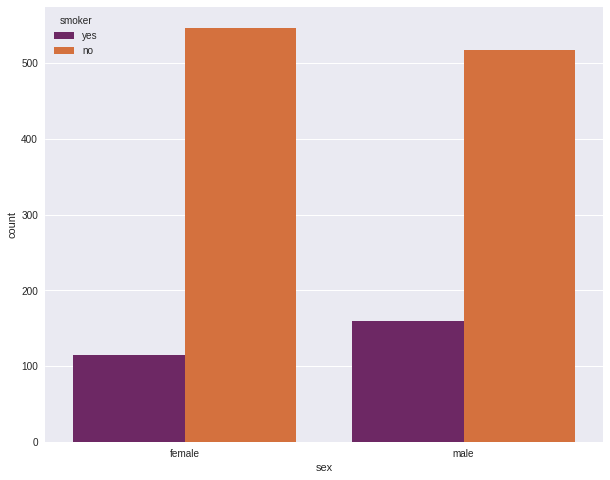

In [51]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="sex", hue="smoker", palette="inferno");

`smoker` by `region` indicates that in the southeast, there are relatively more smokers

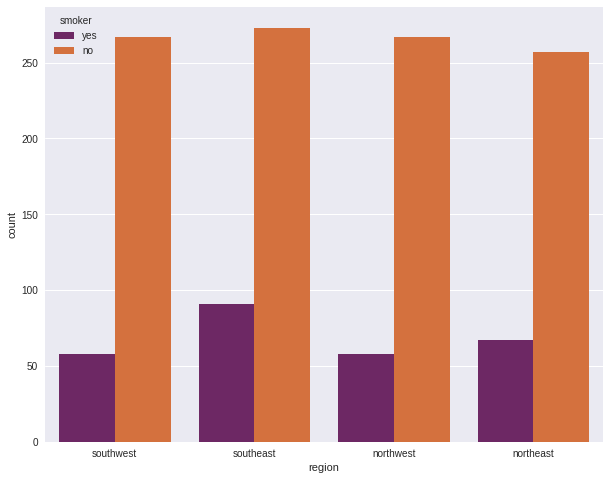

In [52]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="region", hue="smoker", palette="inferno");

Histogram of the target variable - `charges`. The distribution of the target variable is right skewed. LAter on, we apply log transformation to make it look more normal.

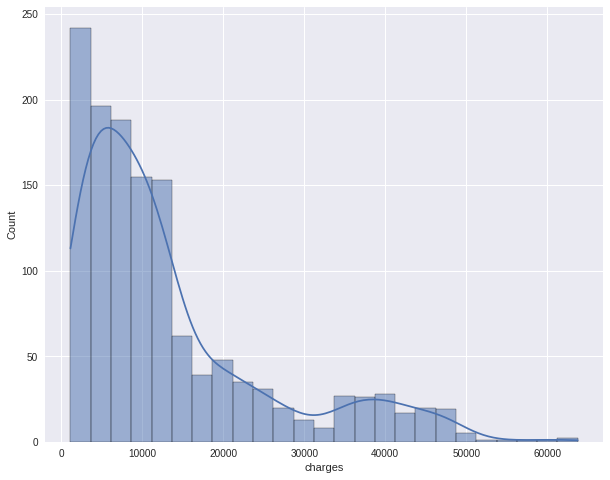

In [59]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True);

We can hypothesize that `charges` are more for `smokers` than `non-smokers`.

As we see, `charges` are higher for smokers, indeed.

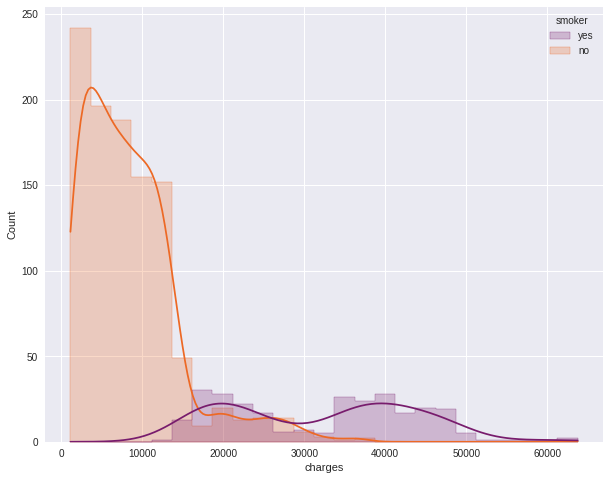

In [60]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True, hue="smoker", element="step", palette="inferno");

Histogram of `charges` by `sex` does not exhibit much difference

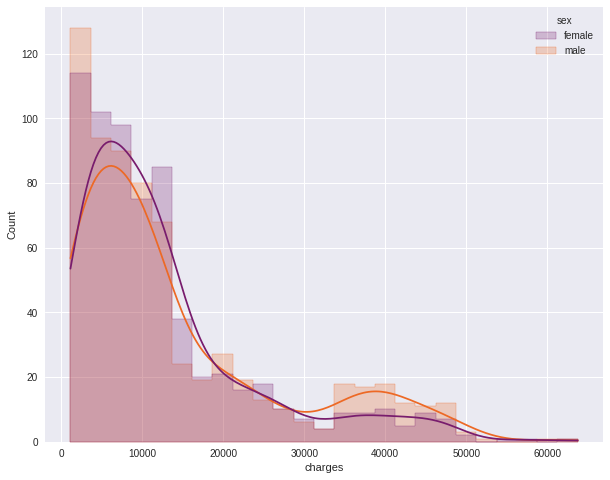

In [61]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True, hue="sex", element="step", palette="inferno");

### Bivariate Analysis

---

In this stage, we analyze the pairs of variables, not single one.

The heatmap of the correlation shows that independent variables are not correlated to the target variable.

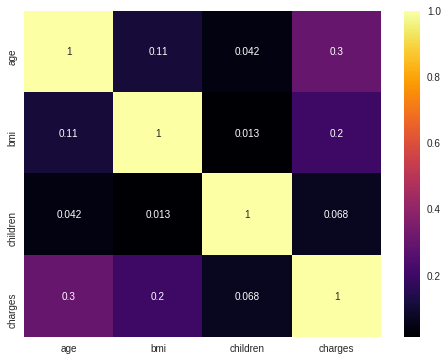

In [67]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(), cmap = "inferno", annot=True);

NameError: name 'data' is not defined

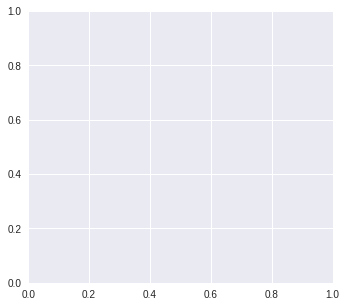

In [69]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

https://www.kaggle.com/mariapushkareva/medical-insurance-cost-with-linear-regression


https://www.kaggle.com/sudhirnl7/linear-regression-tutorial


https://seaborn.pydata.org/generated/seaborn.scatterplot.html


https://seaborn.pydata.org/tutorial/relational.html

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

/home/okroshiashvili/miniconda3/envs/learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/okroshiashvili/miniconda3/envs/learning/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


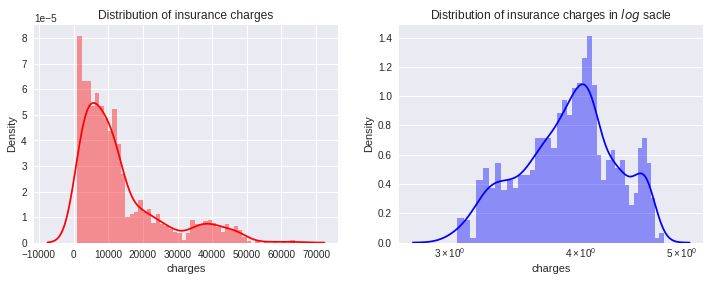

In [31]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

## Data Processing

---

In this step, we are processing data in a way to fit the model. Invalid or ill-processed data causes to degrade model performance and hence give biased results.

## Linear Regression

---

Linear regression is a supervised learning algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square error  (MSE) . In statistics OLS is method to estimated unknown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression function.